# **GOOGLE STOCK PREDICTION USING NEURAL NETWORK** 

---

Bidirectional long-short term memory(Bidirectional LSTM) is the process of making any neural network o have the sequence information in both directions backwards (future to past) or forward(past to future)

BRNN are really just putting two independent RNNs together. The input sequence is fed in normal time order for one network, and in reverse time order for another


* LSTM (Long Short Term Memory)
* BiLSTM (Bidirectional Long Short Term Memory)



In this project we are going to investigate price of the stock over time.
Thus, We attempt to predict future stock behavior
(Predicting the stock price of GOOGLE dataset)

# GOOGLE dataset 

## reading dataset

In [1]:
from google.colab import drive
drive.mount('/gdrive')
root='/gdrive/MyDrive/'

Mounted at /gdrive


**importing libraries**

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN,Dropout
from keras.callbacks import History
from keras.layers import Embedding

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

import time #helper libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from numpy import newaxis

import time

# For time stamps
from datetime import datetime


In [3]:
pd.set_option('display.max_columns',None)  #to show all columns
data= pd.read_csv(root+'Google_Stock_Price_Train.csv', parse_dates=True, index_col='Date', squeeze=True) #reading dataset
data_test=pd.read_csv(root+'Google_Stock_Price_Test.csv', parse_dates=True, index_col='Date', squeeze=True)

In [4]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [6]:
cols=['Close','Volume']

for c in cols:
  #convert strings to numbers in dataset
  data[c] = data[c].str.replace(',','').astype(float) 

In [7]:
n2Row, n2Col = data.shape
print(f'There are {n2Row} rows and {n2Col} columns in Google_Stock_Price_Train dataset')
n3Row, n3Col = data_test.shape
print(f'There are {n3Row} rows and {n3Col} columns in Google_Stock_Price_Test dataset')

There are 1258 rows and 5 columns in Google_Stock_Price_Train dataset
There are 20 rows and 5 columns in Google_Stock_Price_Test dataset


In [8]:
data.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [10]:
#convert strings to numbers in dataset
data_test['Volume'] = data_test['Volume'].str.replace(',','').astype(float) 

In [11]:
data_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,1657300.0
2017-01-04,788.36,791.34,783.16,786.90,1073000.0
2017-01-05,786.08,794.48,785.02,794.02,1335200.0
2017-01-06,795.26,807.90,792.20,806.15,1640200.0
2017-01-09,806.40,809.97,802.83,806.65,1272400.0


With regard to datasets, we have to remove extra spaces in column names and convert strings to numbers in order to make data ready for use in calculations:

In [12]:
GOOGLE=data.copy()
GOOGLE_test = data_test.copy()

In [13]:
GOOGLE_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,1657300.0
2017-01-04,788.36,791.34,783.16,786.90,1073000.0
2017-01-05,786.08,794.48,785.02,794.02,1335200.0
2017-01-06,795.26,807.90,792.20,806.15,1640200.0
2017-01-09,806.40,809.97,802.83,806.65,1272400.0


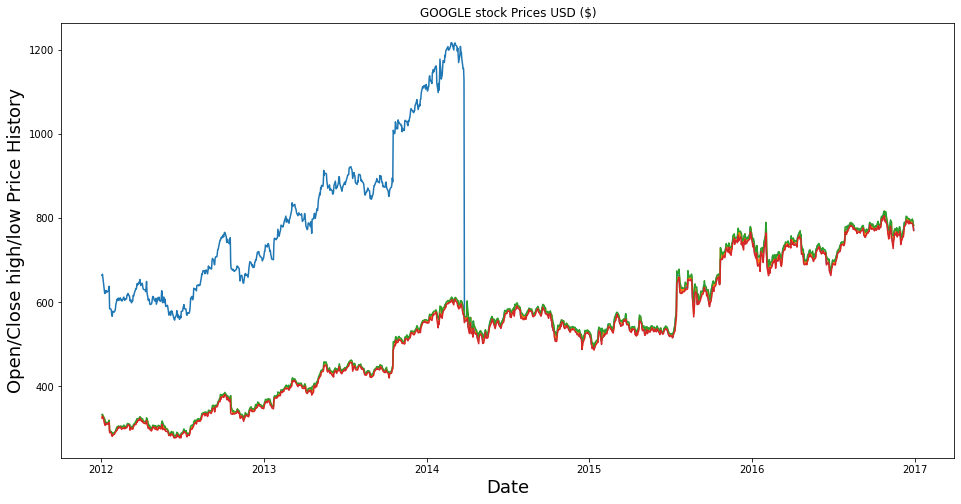

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(16,8))
plt.title('GOOGLE stock Prices USD ($)')
plt.plot(GOOGLE[['Close','Open', 'High', 'Low']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open/Close high/low Price History', fontsize=18)
plt.show()
plt.tight_layout()

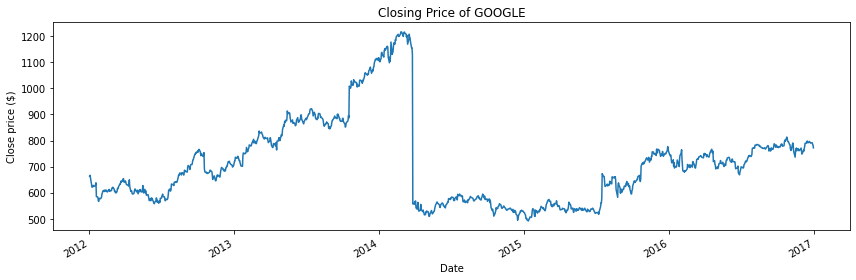

In [15]:
plt.figure(figsize=(12, 4))
plt.subplots_adjust(top=1.25, bottom=1.2)

GOOGLE['Close'].plot()
plt.ylabel('Close price ($)')
plt.xlabel('Date')
plt.title(f"Closing Price of GOOGLE")
    
plt.tight_layout()

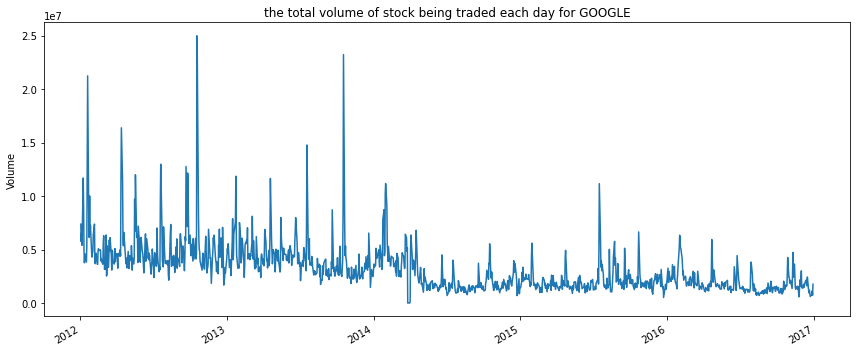

In [16]:
plt.figure(figsize=(12, 5))

GOOGLE['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"the total volume of stock being traded each day for GOOGLE")
    
plt.tight_layout()

## The moving average of the various stocks

In [17]:
ma_day = [10, 20, 50] #the most common moving averages

for ma in ma_day:
    column_name = f"MA for {ma} days"
    GOOGLE[column_name] = GOOGLE['Open'].rolling(ma).mean()

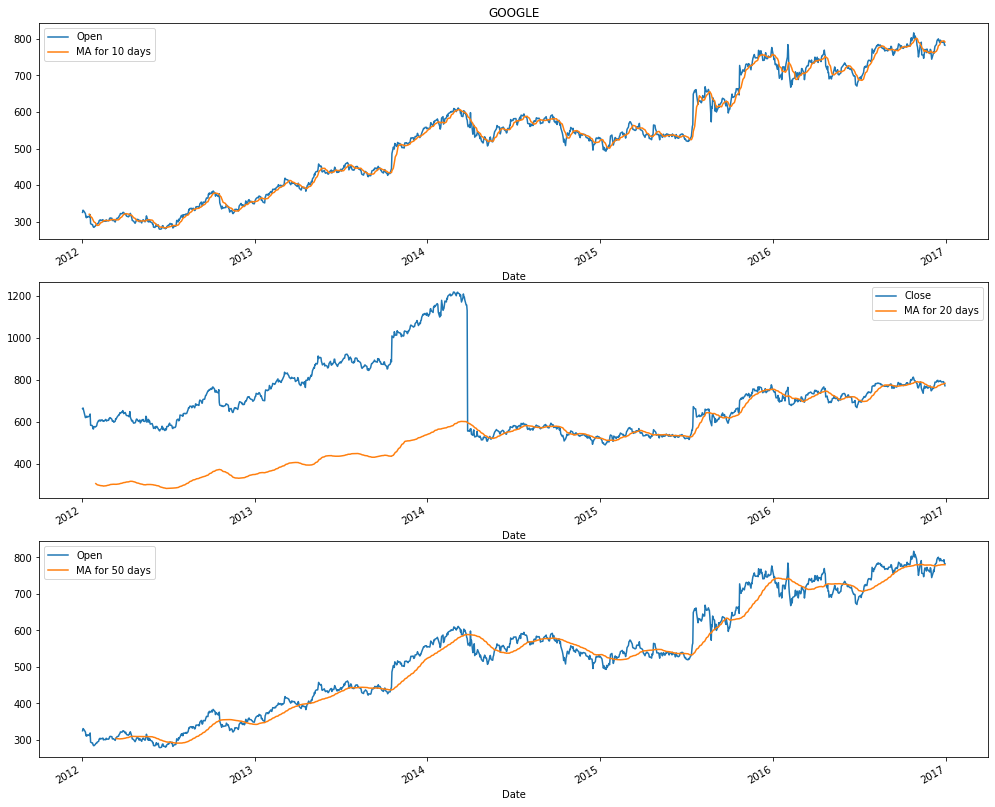

<Figure size 1224x360 with 0 Axes>

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(15)
fig.set_figwidth(17)

plt.figure(figsize=(17, 5))

plt.subplots_adjust(top=1.25, bottom=1.2)

GOOGLE[['Open', 'MA for 10 days']].plot(ax=axes[0])
axes[0].set_title('GOOGLE')
GOOGLE[['Close','MA for 20 days']].plot(ax=axes[1])
GOOGLE[['Open','MA for 50 days']].plot(ax=axes[2])



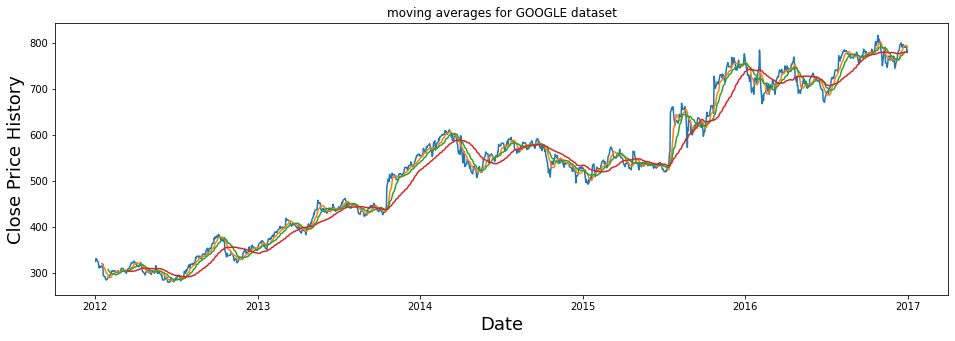

In [19]:
fig.set_figheight(5)
fig.set_figwidth(18)
plt.figure(figsize=(16,5))
plt.title('moving averages for GOOGLE dataset')
plt.plot(GOOGLE[['Open', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price History', fontsize=18)
plt.show()
fig.tight_layout()

##The percent change for each day

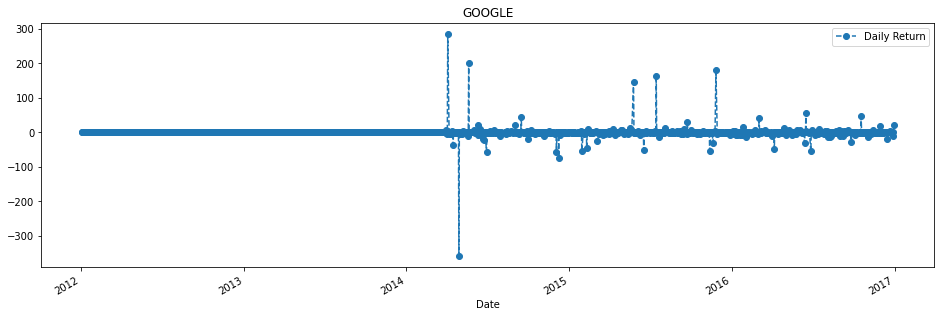

In [20]:
company_list=[GOOGLE]
for company in company_list:
    company['Daily Return'] = (company['Close']-company['Open']).pct_change() # using pct_change to find the percent change for each day

# plotting the daily return percentage

fig.set_figheight(7)
fig.set_figwidth(18)
plt.figure(figsize=(16,5))

GOOGLE['Daily Return'].plot( legend=True, linestyle='--', marker='o')
plt.title('GOOGLE')

fig.tight_layout()

# FITTING GOOGLE DATASET TO MODEL

In [21]:
train=GOOGLE.loc[:,["Close"]].values
#scaler=MinMaxScaler(feature_range=(0,1))
scaler= StandardScaler()
train_scaled=scaler.fit_transform(train)

g= GOOGLE_test.reset_index().copy()
test=g.loc[:,["Close"]].values
#scaler=MinMaxScaler(feature_range=(0,1))
test_scaled=scaler.fit_transform(test)

In [22]:
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

dataset_test= data_test.values
# Get the number of rows to train the model on
test_data_len = int(np.ceil( len(dataset_test) * .95 ))

training_data_len,test_data_len

(1196, 19)

now we choose a specific stock feature ,drop feature: volume,normalize stock data ,then create train, validation and test data sets

Normalization is a very important part for any Recurrent Neural Network. For our LSTM model, normalization will play an important role. Normalization using MinMaxScaler will bring our entire datapoints between a minimum and a maximum value. For this purpose, we will use the values (0,1).

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(np.array(dataset).reshape(-1,1))
scaled_data_test= scaler.fit_transform(np.array(dataset_test).reshape(-1,1))

In [24]:
x=data
y=np.array(GOOGLE['Close']).reshape(-1,1)
y=scaler.fit_transform(np.array(GOOGLE['Close']).reshape(-1,1))

X=data_test
Y=np.array(GOOGLE_test['Close'])

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_valid, y_train, y_valid  = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

x_train = (np.array(x_train)).reshape(x_train.shape[0],x_train.shape[1],1)
x_test = (np.array(x_test)).reshape(x_test.shape[0],x_test.shape[1],1)

In [26]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

print('X.shape = ', X.shape)
print('Y.shape = ',Y.shape)

x_train.shape =  (754, 5, 1)
y_train.shape =  (754, 1)
x_valid.shape =  (252, 5)
y_valid.shape =  (252, 1)
x_test.shape =  (252, 5, 1)
y_test.shape =  (252, 1)
X.shape =  (20, 5)
Y.shape =  (20,)


### LSTM MODEL NO.1

In [27]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1),
               activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
               kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
               bias_initializer='zeros', unit_forget_bias=True,
               recurrent_dropout=0.2, 
               return_state=False, go_backwards=False,))
model.add(Dropout(0.6))
model.add(LSTM(64,  return_sequences=True, input_shape= (x_train.shape[1], 1),
               activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
               kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
               bias_initializer='zeros', unit_forget_bias=True,
               kernel_constraint=None, recurrent_constraint=None, bias_constraint=None,
               recurrent_dropout=0.2, 
               return_state=False, go_backwards=False,))
model.add(Dropout(0.6))
model.add(LSTM(25 , return_sequences=True, input_shape= (x_train.shape[1], 1),
               activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
               kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
               bias_initializer='zeros', unit_forget_bias=True,
               kernel_constraint=None, recurrent_constraint=None, bias_constraint=None,
               recurrent_dropout=0.2, 
               return_state=False, go_backwards=False,))
model.add(LSTM(10, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 64)             49408     
                                                                 
 dropout_1 (Dropout)         (None, 5, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 5, 25)             9000      
                                                                 
 lstm_3 (LSTM)               (None, 10)                1440      
                                                                 
 dense (Dense)               (None, 25)                2

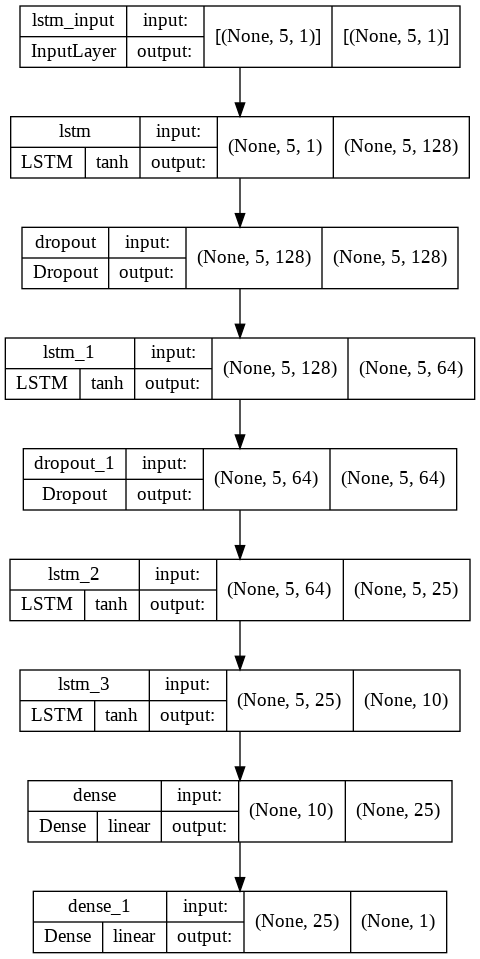

In [28]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

We now train our model with the training data over 100 epochs and with a batch size = 64

In [29]:
# Train the model
history =model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=100, batch_size=64 ,validation_split=0.10,  verbose=1 , shuffle=True)

Epoch 1/100
11/11 [==============================] - 11s 155ms/step - loss: 0.0806 - accuracy: 0.0000e+00 - val_loss: 0.0722 - val_accuracy: 0.0000e+00
Epoch 2/100
11/11 [==============================] - 0s 39ms/step - loss: 0.0565 - accuracy: 0.0000e+00 - val_loss: 0.0541 - val_accuracy: 0.0000e+00
Epoch 3/100
11/11 [==============================] - 0s 42ms/step - loss: 0.0544 - accuracy: 0.0000e+00 - val_loss: 0.0556 - val_accuracy: 0.0000e+00
Epoch 4/100
11/11 [==============================] - 0s 41ms/step - loss: 0.0542 - accuracy: 0.0000e+00 - val_loss: 0.0544 - val_accuracy: 0.0000e+00
Epoch 5/100
11/11 [==============================] - 0s 41ms/step - loss: 0.0532 - accuracy: 0.0000e+00 - val_loss: 0.0539 - val_accuracy: 0.0000e+00
Epoch 6/100
11/11 [==============================] - 0s 41ms/step - loss: 0.0536 - accuracy: 0.0000e+00 - val_loss: 0.0548 - val_accuracy: 0.0000e+00
Epoch 7/100
11/11 [==============================] - 0s 40ms/step - loss: 0.0533 - accuracy: 0.000

In [30]:
print('accuracy =',history.history['accuracy'][-1])
print('Val accuracy =',history.history['val_accuracy'][-1])

accuracy = 0.0014749262481927872
Val accuracy = 0.0


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


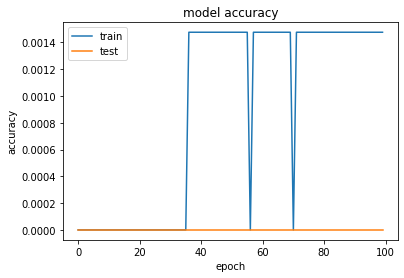

In [31]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense

# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(16,8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

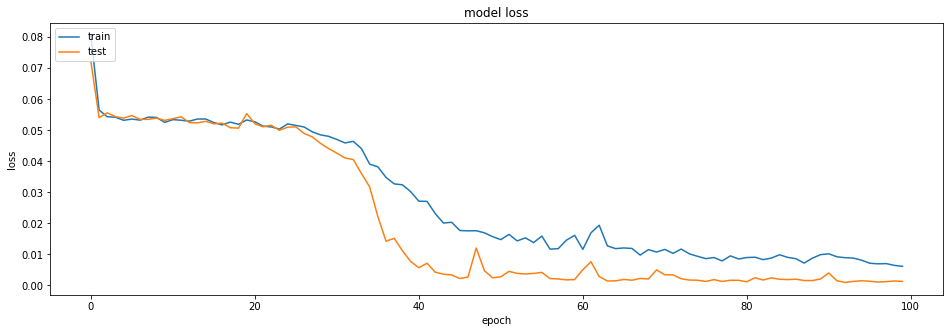

In [32]:
# summarize history for loss
plt.figure(figsize=(16,5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

in the next part, we check model's prediction on the test data. We will store the prediction in y_pred, but as the data is scaled, so, we will inverse scale the data using scaler.inverse_transform() method.

It is clear that the data is a vector. Since MinMaxScaler works on numpy 2D arrays, not on vectors, So, we will convert data to 2D array and then apply the scaling.

### LSTM MODEL NO.2

In [33]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


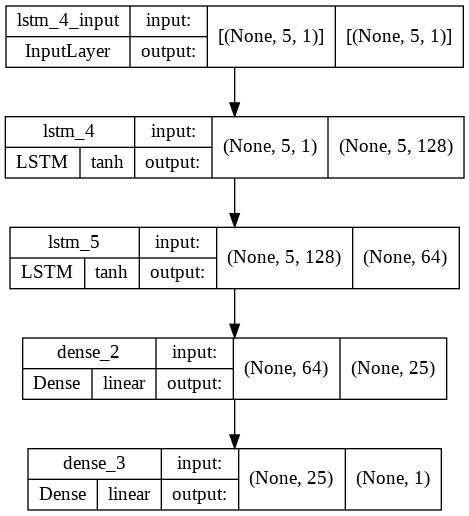

In [34]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

In [35]:
start = time.time()
model.compile(loss='mse',  optimizer='adam', metrics=['accuracy'])
print ('compilation time : ', time.time() - start)

compilation time :  0.010620355606079102


Keras's fit() does not return the model but it returns a History object that contain per-epoch loss and metrics.

In [36]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,batch_size=32,validation_split=0.25,  verbose=1 , shuffle=True)

Epoch 1/100
18/18 [==============================] - 6s 57ms/step - loss: 0.0712 - accuracy: 0.0000e+00 - val_loss: 0.0473 - val_accuracy: 0.0000e+00
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 0.0573 - accuracy: 0.0000e+00 - val_loss: 0.0495 - val_accuracy: 0.0000e+00
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 0.0531 - accuracy: 0.0000e+00 - val_loss: 0.0452 - val_accuracy: 0.0000e+00
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 0.0500 - accuracy: 0.0000e+00 - val_loss: 0.0430 - val_accuracy: 0.0000e+00
Epoch 5/100
18/18 [==============================] - 0s 23ms/step - loss: 0.0493 - accuracy: 0.0000e+00 - val_loss: 0.0575 - val_accuracy: 0.0000e+00
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - loss: 0.0474 - accuracy: 0.0000e+00 - val_loss: 0.0426 - val_accuracy: 0.0000e+00
Epoch 7/100
18/18 [==============================] - 0s 23ms/step - loss: 0.0421 - accuracy: 0.0000e

Keras's fit() does not return the model but it returns a History object that contain per-epoch loss and metrics.

In [37]:
print('accuracy =',history.history['accuracy'][-1])
print('Val accuracy =',history.history['val_accuracy'][-1])

accuracy = 0.0017699114978313446
Val accuracy = 0.0


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


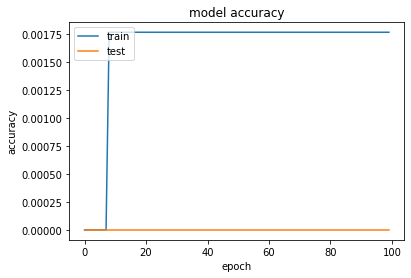

In [38]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense

# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(16,8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

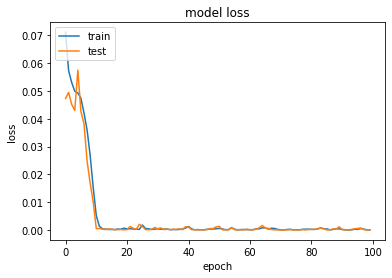

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### VISUlIZATION

now visualize the whole data, training and testing part in a single graph

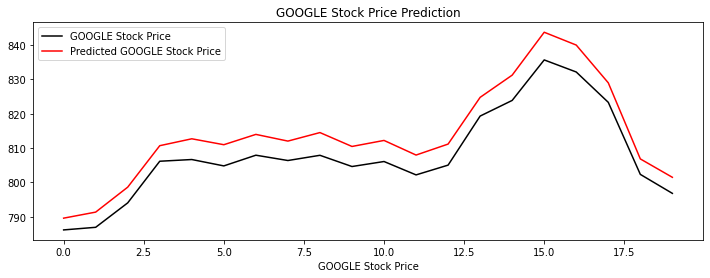

In [40]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = Y
pred=np.array(real_stock_price).reshape(-1, 1)

predicted_stock_price = model.predict(X)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


plt.plot(real_stock_price, color='black', label='GOOGLE Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted GOOGLE Stock Price')

plt.title('GOOGLE Stock Price Prediction')
plt.xlabel('Time')
plt.xlabel('GOOGLE Stock Price')
plt.legend()
plt.show()

### BI-LSTM MODEL

setup

In [41]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional


In [42]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay

Build the bidirectional lstm model

In [43]:
from keras.backend import batch_normalization
# define model
model = Sequential()
model.add(Bidirectional(LSTM(20,return_sequences=True, activation='softmax'), input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(60,return_sequences=False, activation='linear')))
model.add(Dropout(0.6))
model.add(Dense(1,activation='softmax'))
model.build()

In [44]:
start = time.time()
model.compile(loss='mse',  optimizer='adam', metrics=['accuracy'])
print ('compilation time : ', time.time() - start)

compilation time :  0.008034229278564453


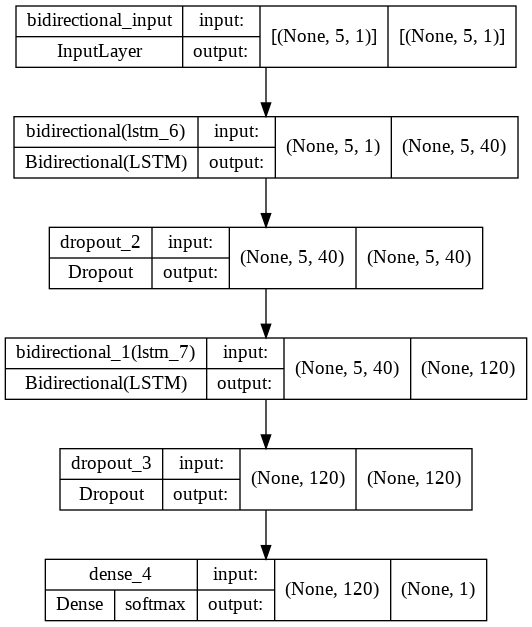

In [45]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

In [46]:
history =model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50,batch_size=32,validation_split=0.25,  verbose=1 , shuffle=True)

Epoch 1/50
18/18 [==============================] - 12s 87ms/step - loss: 0.5206 - accuracy: 0.0018 - val_loss: 0.5536 - val_accuracy: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 0s 26ms/step - loss: 0.5206 - accuracy: 0.0018 - val_loss: 0.5536 - val_accuracy: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 0s 27ms/step - loss: 0.5206 - accuracy: 0.0018 - val_loss: 0.5536 - val_accuracy: 0.0000e+00
Epoch 4/50
18/18 [==============================] - 0s 26ms/step - loss: 0.5206 - accuracy: 0.0018 - val_loss: 0.5536 - val_accuracy: 0.0000e+00
Epoch 5/50
18/18 [==============================] - 1s 29ms/step - loss: 0.5206 - accuracy: 0.0018 - val_loss: 0.5536 - val_accuracy: 0.0000e+00
Epoch 6/50
18/18 [==============================] - 0s 26ms/step - loss: 0.5206 - accuracy: 0.0018 - val_loss: 0.5536 - val_accuracy: 0.0000e+00
Epoch 7/50
18/18 [==============================] - 0s 27ms/step - loss: 0.5206 - accuracy: 0.0018 - val_loss: 0.5536 - val_accur

In [47]:
print('accuracy =',history.history['accuracy'][-1])
print('Val accuracy =',history.history['val_accuracy'][-1])

accuracy = 0.0017699114978313446
Val accuracy = 0.0


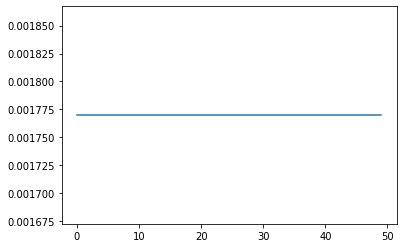

In [48]:
plt.plot(history.history['accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


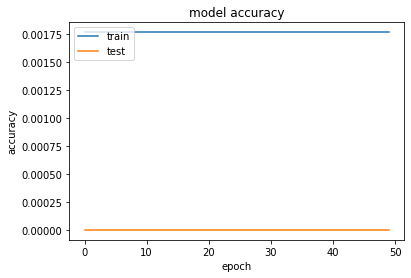

In [49]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense

# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(16,8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

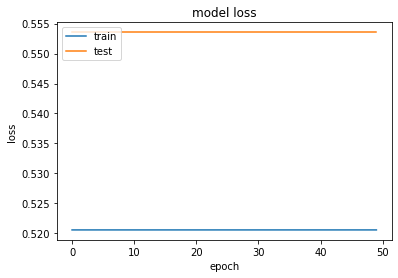

In [50]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### VISUALIZATION

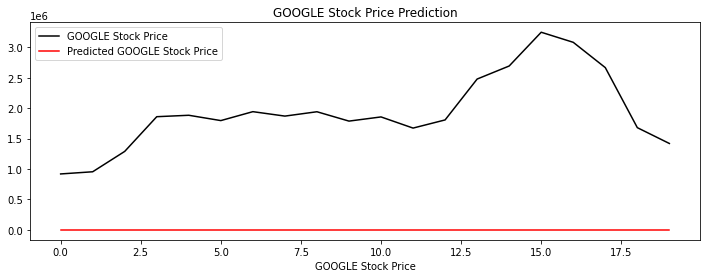

In [51]:
from pandas.compat.numpy.function import STAT_FUNC_DEFAULTS
# Predict the stock prices
plt.figure(figsize=(12, 4))

#scaler = MinMaxScaler(feature_range=(0,1))
real_stock_price = np.array(Y).reshape(-1,1)
real_stock_price = scaler.fit_transform(real_stock_price )

Xs= np.array(X.iloc[:,4]).reshape(-1,1)
Xs=scaler.fit_transform(Xs)
predicted_stock_price = model.predict(Xs)


real_stock_price= scaler.inverse_transform(real_stock_price)
#predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color='black', label='GOOGLE Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted GOOGLE Stock Price')

plt.title('GOOGLE Stock Price Prediction')
plt.xlabel('Time')
plt.xlabel('GOOGLE Stock Price')
plt.legend()
plt.show()